In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [23]:
### load the dataset

df = pd.read_csv('C:/Users/Jackson/Desktop/U of T data science/team project/asthma_disease_data.csv')

### observe the dataset
df.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [24]:
# get info for the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [25]:
# check the number of rows and columns (there are 2392 rows, 29 columns)

df.shape

(2392, 29)

In [26]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# check if there are any null values (no null values in the dataset)

df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [28]:

# 2392 records, 29 columns

print(df)

      PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          5034   63       0          1               0  15.848744        0   
1          5035   26       1          2               2  22.757042        0   
2          5036   57       0          2               1  18.395396        0   
3          5037   40       1          2               1  38.515278        0   
4          5038   61       0          0               3  19.283802        0   
...         ...  ...     ...        ...             ...        ...      ...   
2387       7421   43       1          0               2  29.059613        0   
2388       7422   18       1          0               1  20.740850        0   
2389       7423   54       0          3               2  37.079560        0   
2390       7424   46       1          0               2  23.444712        0   
2391       7425   26       1          0               0  28.123021        1   

      PhysicalActivity  DietQuality  SleepQuality  

# include below to README file:

### Plan:
use KNN and/or logistic regression to predict the asthma possibility based on known factors, such as demographic details and life style factors.

### Steps for KNN:

1. load the dataset

2. observe and describe the dataset

3. preprocess data

1> drop unnecessary columns

2> analyze and convert categorical value
how do we process both numerical and categorical predictor values at the same time?
when do we neeed to standardize the predictor values?
most categorical value is coded as binary 0 or 1. two values are assigned integer 0 to 3, 'ethnicity' is not ordinal, 'education level' is ordinal.
- need to convert 4 'ethnicity' values to 4 binary columns
- education level: 4 values are ordinal, they can stay
- other binary data can stay as 0 and 1


4. split datasets into separate training and testing datasets

5. standardize the data/ feature scaling

6. fit knn model, using k = square root of n in testing dataset

7. check the prediction accuracy, use confusion matrix/table

### lession learned:

1. How to convert preprocess categorical values regarding data cleaning/preprocess
how to deal with categorical and ordinal values, 
how to convert categorical and non-ordinal variable to binary values, using one hot encoding
I have searched the methods of fixing these issues and included them as tips in this document

2. How to analyze correlcations between each predictor values and the target value
Use heatmap we can have a better idea of the most related predictor variables, which facilitates the feature selection process
From the reference link (https://medium.com/analytics-vidhya/machine-learning-2-correlation-matrix-feature-selection-class-imbalance-decision-trees-9a447fdb825), I have learned the way to analyze the correlations for each predictable factors.

3. How to deal with imbalanced dataset
After inital analysis, I found that the model cannot predict any positive cases, even though the accuracy rate is pretty high at 95%, as a result of all results are predicted as negative.
The dataset is imperfect to start with. The correlations are not strong, all are below 0.1, most of them are at 0.02 or even lower. There are only 124 positive cases out of the 2400 total records.
As suggested from the reference link from above, I tried the method of increasint the traning dataset from 80% to 90% or even 95%, but still it has little improvement on the diagnosis result. This leaves room for me to explore more solutions later on. I also understand that not all datasets are perfect.

4. Communication and engagement with other team members
Google doc: I created a team project doc on google drive to take notes from our meetings and list the things to do for each member, so that even some members might miss the meeting, all of us can still have a written document to be inline with each other. The document serves as a tracking tool to record the progress of our project and each member's input.
Slack: we also use slack to communicate after hours for any updates that we made on github.

5. Tried different to solve the issue
I have used KNN and logistic regression to analyze the dataset, both were using 90% for training set ,10% for testing. The classification report from both analysis is the same.
In this case, changing the method to analyze the dataset, does not really change the performance of the analysis.

          precision    recall  f1-score   support

           0       0.95      1.00      0.98       229
           1       0.00      0.00      0.00        11

    accuracy                           0.95       240
   macro avg       0.48      0.50      0.49       240
weighted avg       0.91      0.95      0.93       240



In [29]:
# remove unnecessary columns from the dataset

df_new = df.drop(columns=['PatientID','DoctorInCharge'])
df_new.head(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0


### Tips: how to pre process data

-All categorical data:

if there is natural order among the data, convert them to numerical values based on the natural order.

If there is no order and there are more than 2 categories, convert to one hot encoding

If there is no order < 3 categories, convert to numeric.

-Numeric data:

You should normalize the data. Why?

If one field has # in the range of say 1000, and other in the range of say 10, then consider 2 rows:

Field a, field b

10, 1000

40, 1400

If you did not normalize, field b will have dis proportionate impact (as the Euclidean distance is much higher for field b than on field a ) on the outcome, even though the 2nd row field a value is 4 times row 1, and field b is only 1.4 times. Hence without normalization, you may not get good accuracy ( or f1 score, precision, recall, tpt, tnt,….)on test data

### Tips: Convert array of indices to one-hot encoded array in NumPy

Create a zeroed array b with enough columns, i.e. a.max() + 1.
Then, for each row i, set the a[i]th column to 1.

>>> 
a = np.array([1, 0, 3])
>>> 
b = np.zeros((a.size, a.max() + 1))
>>> 
b[np.arange(a.size), a] = 1

>>> 
b

array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [30]:
# convert categorical values (Ethnicity values 0,1,2,3) to one-hot encoded array in Numpy

a = df_new['Ethnicity']
b = np.zeros((a.size,a.max()+1))

b[np.arange(a.size),a] = 1

b

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [31]:
# add the convertd columns (multiple columns) to pandas dataframe

df_new['Ethnicity_0'] = b[:,0]
df_new['Ethnicity_1'] = b[:,1]
df_new['Ethnicity_2'] = b[:,2]
df_new['Ethnicity_3'] = b[:,3]
df_new

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1,0,0,1,0,0.0,1.0,0.0,0.0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,0,1,1,1,0,0.0,0.0,1.0,0.0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,1,1,0,1,1,0,0.0,0.0,1.0,0.0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,1,1,1,0,0,0.0,0.0,1.0,0.0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,1,1,0,0,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,...,1,0,0,0,1,1,1.0,0.0,0.0,0.0
2388,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,...,0,0,1,1,0,1,1.0,0.0,0.0,0.0
2389,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,...,0,1,1,0,1,1,0.0,0.0,0.0,1.0
2390,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,9.448862,...,1,1,0,1,1,0,1.0,0.0,0.0,0.0


In [32]:
# drop the original 'Ethnicity' column

df_new = df_new.drop(columns=['Ethnicity'])
df_new

,Age,Gender,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,...,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,63,0,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,...,0,1,0,0,1,0,0.0,1.0,0.0,0.0
1,26,1,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,...,0,0,1,1,1,0,0.0,0.0,1.0,0.0
2,57,0,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,...,1,1,0,1,1,0,0.0,0.0,1.0,0.0
3,40,1,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,...,0,1,1,1,0,0,0.0,0.0,1.0,0.0
4,61,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,...,1,1,0,0,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,7.314582,...,1,0,0,0,1,1,1.0,0.0,0.0,0.0
2388,18,1,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,2.279073,...,0,0,1,1,0,1,1.0,0.0,0.0,0.0
2389,54,0,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,3.055139,...,0,1,1,0,1,1,0.0,0.0,0.0,1.0
2390,46,1,2,23.444712,0,9.672637,7.362861,6.717272,9.448862,7.712584,...,1,1,0,1,1,0,1.0,0.0,0.0,0.0


In [33]:
# move 'Diagnosis' column to the end

df1 = df_new.pop('Diagnosis') # remove column Diabnosis and store it in df1
df_new['Diagnosis']=df1 # add Diagnosis column as a 'new' column

df_new

,Age,Gender,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,...,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Diagnosis
0,63,0,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,...,0,1,0,0,1,0.0,1.0,0.0,0.0,0
1,26,1,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,...,0,0,1,1,1,0.0,0.0,1.0,0.0,0
2,57,0,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,...,1,1,0,1,1,0.0,0.0,1.0,0.0,0
3,40,1,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,...,0,1,1,1,0,0.0,0.0,1.0,0.0,0
4,61,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,...,1,1,0,0,1,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,7.314582,...,1,0,0,0,1,1.0,0.0,0.0,0.0,1
2388,18,1,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,2.279073,...,0,0,1,1,0,1.0,0.0,0.0,0.0,1
2389,54,0,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,3.055139,...,0,1,1,0,1,0.0,0.0,0.0,1.0,1
2390,46,1,2,23.444712,0,9.672637,7.362861,6.717272,9.448862,7.712584,...,1,1,0,1,1,1.0,0.0,0.0,0.0,0


In [12]:
# export the df_new to csv file

df_new.to_csv('C:/Users/Jackson/Desktop/U of T data science/team project/asthma_disease_data_processed.csv')

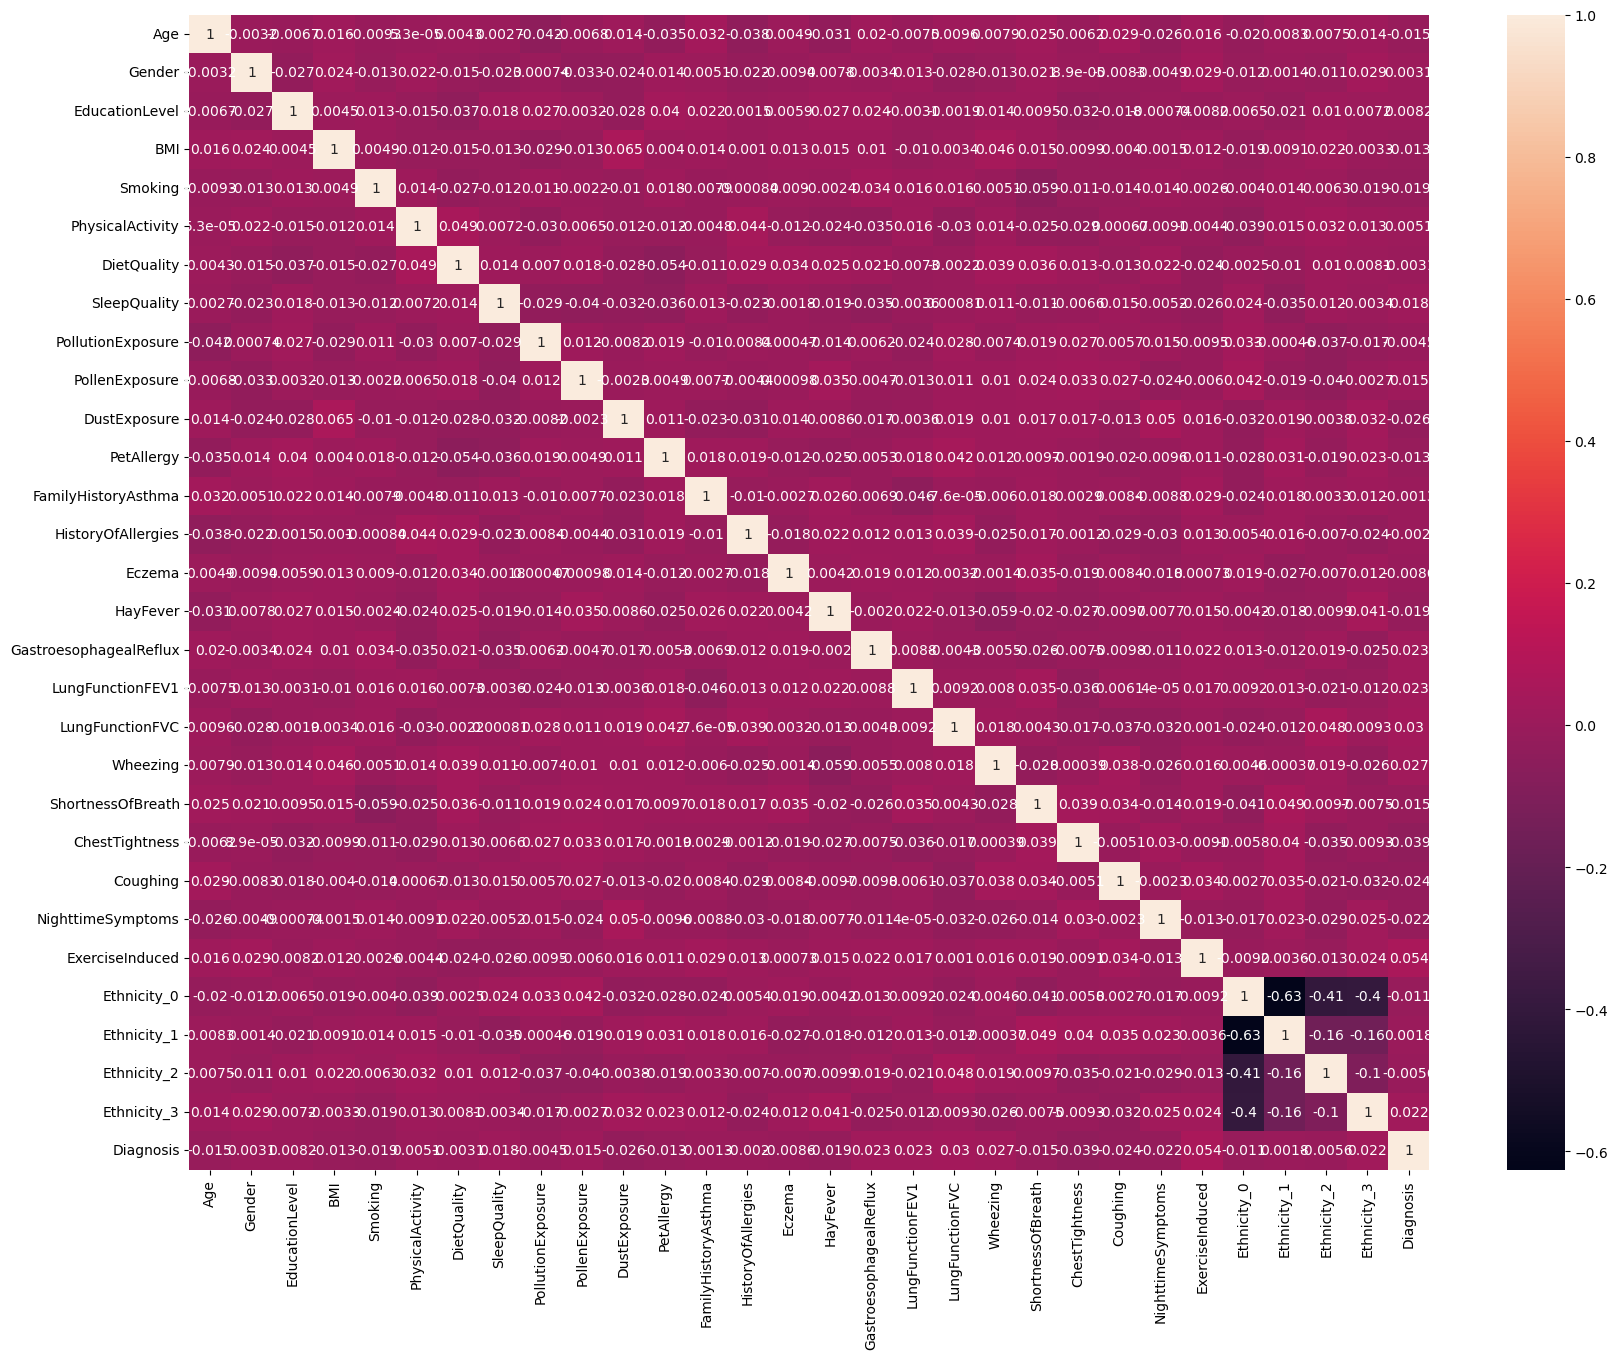

In [34]:
# createa correlation matrix using the seaborn library. This matrix shows us the relationship of all properties to each other in a color palette.
# The values of two variables with positive correlation increase or decrease together.
# While the value of one of the two variables with negative correlation increases, that of the other decreases.

corr_matrix = df_new.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [46]:
# If the value is close to 0, it indicates that there is no connection between these two variables. 
# Our goal is to find the properties with a correlation value close to 0 with the quality property and eliminate them.

cor_target = abs(corr_matrix["Diagnosis"])
relevant_features = cor_target[cor_target>0.02]
relevant_features

DustExposure              0.025972
GastroesophagealReflux    0.022770
LungFunctionFEV1          0.023336
LungFunctionFVC           0.029629
Wheezing                  0.027197
ChestTightness            0.039278
Coughing                  0.024193
NighttimeSymptoms         0.021965
ExerciseInduced           0.053956
Ethnicity_3               0.022309
Diagnosis                 1.000000
Name: Diagnosis, dtype: float64

In [47]:
# We assign the properties with a correlation value below -0.02 or above +0.02 to the variable we created with the name of relevant_features.
# One of these variables is our quality variable, which normally has a correlation value of 1. We will use the remaining 10 variables as predictors.

to_drop = cor_target[cor_target<0.02]
to_drop

Age                    0.015111
Gender                 0.003128
EducationLevel         0.008185
BMI                    0.012522
Smoking                0.019321
PhysicalActivity       0.005066
DietQuality            0.003149
SleepQuality           0.018022
PollutionExposure      0.004535
PollenExposure         0.015099
PetAllergy             0.013078
FamilyHistoryAsthma    0.001334
HistoryOfAllergies     0.001951
Eczema                 0.008592
HayFever               0.019141
ShortnessOfBreath      0.015281
Ethnicity_0            0.011398
Ethnicity_1            0.001778
Ethnicity_2            0.005584
Name: Diagnosis, dtype: float64

In [48]:
# Age, Gender, Education Level, and etc variables are also features that we detect low correlation and will not use. 
# We also collected them in the to_drop variable.

type(to_drop)

pandas.core.series.Series

In [50]:
# convert the datatype to dataframe
to_drop_frame = to_drop.to_frame()
to_drop_frame


,Diagnosis
Age,0.015111
Gender,0.003128
EducationLevel,0.008185
BMI,0.012522
Smoking,0.019321
PhysicalActivity,0.005066
DietQuality,0.003149
SleepQuality,0.018022
PollutionExposure,0.004535
PollenExposure,0.015099


In [51]:
# turn these variables into a list and finalize the list of variables that we will drop by adding the Diagnosis quality.

row_names = to_drop_frame.index
row_names_list = list(row_names)
row_names_list.append('Diagnosis')
y = df_new['Diagnosis'].values
X = df_new.drop(row_names_list, axis=1).values

In [53]:
### split the dataset

# in total there are 30 columns

#X = df_new.iloc[:,0:29] # data from columns 0 to 28 is used as predictor values
#y = df_new.iloc[:,29] # data from column 29 is used as prediction values
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.2) # 20% datasets are used for testing, 80% for training.

In [54]:
### feature scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [55]:
# select value for K as square root of number of records in testing dataset

import math
math.sqrt(len(y_test))

# To avoid unidentified classification, if the sqrt is an even number, minus 1 to set the K

21.88606862823929

In [56]:
### define the model: Init KNN

knn = KNeighborsClassifier(n_neighbors=21, p=2, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [57]:
### evaluate the model
# use confusion matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)


[[459   0]
 [ 20   0]]


In [58]:
# use confusion table

from ISLP import confusion_table
from sklearn import metrics
confusion_table(y_pred, y_test)

Truth,0,1
Predicted,,
0,459,20
1,0,0


In [59]:
print(f1_score(y_test,y_pred))

0.0


In [60]:
print(accuracy_score(y_test, y_pred))

0.9582463465553236


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       459
           1       0.00      0.00      0.00        20

    accuracy                           0.96       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.92      0.96      0.94       479



c:\Users\Jackson\.conda\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jackson\.conda\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jackson\.conda\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [87]:
# We see that our model cannot recognize any of the positive diagnosis (20 samples). 
# So it may be more accurate to have a model that recognizes accuracy a few points less, but also low-quality wines.

# One of the reasons why these examples cannot be distinguished may be that they were not trained with enough prefixes. 
# So in the next step, let’s start the training process again by shrinking our test_size.

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.1) # 10% datasets are used for testing, 90% for training

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [88]:
import math
math.sqrt(len(y_test))

15.491933384829668

In [89]:
knn = KNeighborsClassifier(n_neighbors=15, p=2, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       229
           1       0.00      0.00      0.00        11

    accuracy                           0.95       240
   macro avg       0.48      0.50      0.49       240
weighted avg       0.91      0.95      0.93       240



c:\Users\Jackson\.conda\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jackson\.conda\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jackson\.conda\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

# What insights do we have?

### Imbalanced dataset:
The model cannot predict posistve diagnosis, even thouth the accuracy is high at 95%, mostly due to the predicted result are all negative.

### Reasons:
It seesm the dataset is imbalanced where there are 124 positive diagnosis of Asthma out of the entire 2400 records.The corelations between predictor variables and target variable are not strong, there is no correlation above 0.1, while the strongest corelation is Exercise Included at 0.05, the 2nd strong correlation is with Chest Tightnesss (0.04), followed by Lung Function FVC (0.030), Wheezing (0.027), Dust Exposure (0.026), Coughing (0.024),Lun Function FEV1 (0.023), Nightime Symptoms (0.021) as well as Ethnicity_3 (0.022). (refere to below table for Correlation to related factors from the analysis)

### Solution:
I was tring to solve the imbalanced dataset by increasing the traing set from 80% to 90% (or even tried 95%). The result still does not make any imporvement on predicting positve diagnosis. Maybe there are better ways to solve the issue. But due to the time limit of this project, I will deal with it at a later time. Or maybe we can find a better dataset to work on for the next project.

### Interpretation of the analysis:

Most important factor:
Among all the predictor values, Exercise Induced variable has the strongest correlation with the diagnosis. Exercise-induced asthma is when the airways narrow or squeeze during hard physical activity. It causes shortness of breath, wheezing, coughing, and other symptoms during or after exercise. (reference: https://www.mayoclinic.org/diseases-conditions/exercise-induced-asthma/symptoms-causes/syc-20372300). This shows that exercise seems to be a contributing factor to induce Asthma.

Other related factors:
Most of the related factors are symptom related, such as Gastroesophageal Reflux, Wheezing, Chset Tightness, Couphing, Nighttime Symptoms. Some related factores are based on medical exams, such as Lung function FEV1 and Lung Function FVC.

Demographis factors:
Demographic details have lower correlations (below 0.02) to the diagnosis/target variable (Age has a 0.015 correlation, Gender has little correlation at 0.003), except that Ethnicity_3 has a stronger correlation 0.022. We need the interpretations on what the Ethnicity_3 entails, as this indicates the Ethnicity value equals 3 from the orignial dataset. Once we know what Ethnicity 3 represents, we would have a better idea about the analysis.

Education and lifestyle factors:
We also understands that the educaiton level or lifestyle factors (BMI, Physical Activity, Diet Quality, Pollution Exposure), have little correlations (below 0.02) to the diagnosis,  except that Dust Exposure has a relatively stronger correlation 0.026, Smoking has a slightly strong correlation 0.019, followed by Sleep Quality at 0.018, Pollen Exposure at 0.015.

Medical symptons and history:
Some medical symptoms or medical history, such as Family History of Asthma, History of Allergies, Eczema, seem to have little correlation on the diagnosis, except that Hay Fever has a slightly strong correlation 0.019, followed by shortness of breath at 0.015, Pet Allergy at 0.013.


### Correlations to related factors from the analysis:

DustExposure              0.025972
GastroesophagealReflux    0.022770
LungFunctionFEV1          0.023336
LungFunctionFVC           0.029629
Wheezing                  0.027197
ChestTightness            0.039278
Coughing                  0.024193
NighttimeSymptoms         0.021965
ExerciseInduced           0.053956
Ethnicity_3               0.022309

### Correlations to other factors from the analysis:

Age                    0.015111
Gender                 0.003128
EducationLevel         0.008185
BMI                    0.012522
Smoking                0.019321
PhysicalActivity       0.005066
DietQuality            0.003149
SleepQuality           0.018022
PollutionExposure      0.004535
PollenExposure         0.015099
PetAllergy             0.013078
FamilyHistoryAsthma    0.001334
HistoryOfAllergies     0.001951
Eczema                 0.008592
HayFever               0.019141
ShortnessOfBreath      0.015281
Ethnicity_0            0.011398
Ethnicity_1            0.001778
Ethnicity_2            0.005584
Name: Diagnosis, dtype: float64

reference link:
https://medium.com/analytics-vidhya/machine-learning-2-correlation-matrix-feature-selection-class-imbalance-decision-trees-9a447fdb825